# Patient Counseling

### Importing my drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


This data set is a collection of survey responses taken post therapy session. The goal of this data set is to predict whether or not a patient will be attending 30 or more therapy sessions. The purpose of identifying these patients is because if they are predicted to need this long term care it may be necessary to reevaluate the care that the patient is receiving. The earlier we can predict whether or not the patient is going to need this care the better, in this data set we try & use the first 6 sessions to predict the duration of care.

The survey the patients are taking is based on DASS-21 evaluation which gives a numerical value to the level of depression, anxiety, & stress. The functions declared on the notebook takes the individual scores & evaluates the Depression, anxiety, & stress levels on a scale of 0 - 4 for each category.

In [ ]:
import numpy as np
import pandas as pd
from ipywidgets import Layout
import ipywidgets as widgets

# Data Cleaning & Feature Engineering

### Cleaning

In [ ]:
#edit to make this fit wherever the data is in your files, it's currently coming from my drive
data = pd.read_csv('/content/drive/MyDrive/DASS-21 (Responses) - Form Responses 1.csv')

#ALEX:
#data = pd.read_csv('/content/DASS-21 (Responses) - Form Responses 1.csv')

In [ ]:
data['First/Last Initials (e.g. LP or JTH)'] = data['First/Last Initials (e.g. LP or JTH)'].str.replace('\.', '', regex = True)
data['First/Last Initials (e.g. LP or JTH)'] = data['First/Last Initials (e.g. LP or JTH)'].str.replace('\\', '', regex = True)
data['First/Last Initials (e.g. LP or JTH)'] = data['First/Last Initials (e.g. LP or JTH)'].str.upper()
data['First/Last Initials (e.g. LP or JTH)'] = data['First/Last Initials (e.g. LP or JTH)'].str.replace('\/', '', regex = True)
data['First/Last Initials (e.g. LP or JTH)'] = data['First/Last Initials (e.g. LP or JTH)'].str.replace(' ', '', regex = True)

In [ ]:
data['21-30'] = data['Session #'] == '21-30'
data['30+'] = data['Session #'] == '30+'
data['13-20'] = data['Session #'] == '13-20'
data['3 Month Follow Up'] = data['Session #'] == '3 Month Follow Up'
data['6 Month Follow Up'] = data['Session #'] == '6 Month Follow Up'
data['12 Month Follow Up'] = data['Session #'] == '12 Month Follow Up'
data['Session #'] = data['Session #'].str.replace('3 Month Follow Up', '0', regex = True)
data['Session #'] = data['Session #'].str.replace('6 Month Follow Up', '0', regex = True)
data['Session #'] = data['Session #'].str.replace('12 Month Follow Up', '0', regex = True)
data['Session #'] = data['Session #'].str.replace('13-20', '17', regex = True)
data['Session #'] = data['Session #'].str.replace('21-30', '25', regex = True)
data['Session #'] = data['Session #'].str.replace('30+', '31', regex = False)
data['Session #'] = data['Session #'].astype(int)

In [ ]:
data = data.rename(columns={' ': "date"})

In [ ]:
data['The rating scale is as follows- [I experienced breathing difficulty (e.g., excessively rapid breathing, breathlessness in the absence of physical exertion)]'] = data['The rating scale is as follows- [I experienced breathing difficulty (e.g., excessively rapid breathing, breathlessness in the absence of physical exertion)]'].replace(' ', 0).astype(int)

## DAS Scoring
these functions take the given responses and score the patient on a scale of 0-4 for depression, anxiety, and stress

In [ ]:
def depression(row):
    score = 2*sum([row["The rating scale is as follows- [I couldn't seem to experience any positive feeling at all]"],
                row["The rating scale is as follows- [I found it difficult to work up the initiative to do things]"],
                row["The rating scale is as follows- [I felt that I had nothing to look forward to]"],
                row["The rating scale is as follows- [I felt down-hearted and blue]"],
                row["The rating scale is as follows- [I was unable to become enthusiastic about anything]"],
                row["The rating scale is as follows- [I felt I wasn't worth much as a person]"],
                row["The rating scale is as follows- [I felt that life was meaningless]"]])
    if 0 <= score <= 9:
        return 0
    elif 10 <= score <= 13:
        return 1
    elif 14 <= score <= 20:
        return 2
    elif 21 <= score <= 27:
        return 3
    elif 28 <= score:
        return 4

def anxiety(row):
    score = 2*sum([row['The rating scale is as follows- [I was aware of dryness of my mouth]'],
                row['The rating scale is as follows- [I experienced breathing difficulty (e.g., excessively rapid breathing, breathlessness in the absence of physical exertion)]'],
                row['The rating scale is as follows- [I experienced trembling (e.g., in the hands)]'],
                row['The rating scale is as follows- [I was worried about situations in which I might panic and make a fool of myself]'],
                row['The rating scale is as follows- [I felt I was close to panic]'],
                row['The rating scale is as follows- [I was aware of the action of my heart in the absence of physical exertion (e.g., sense of heart rate increase, heart missing a beat)]'],
                row['The rating scale is as follows- [I felt scared without any good reason]']]
               )
    if 0 <= score <= 7:
        return 0
    elif 8 <= score <= 9:
        return 1
    elif 10 <= score <= 14:
        return 2
    elif 15 <= score <= 19:
        return 3
    elif 20 <= score:
        return 4

def stress(row):
    score = 2*sum([row['The rating scale is as follows- [I found it hard to wind down]'],
                row['The rating scale is as follows- [I tended to over-react to situations]'],
                row['The rating scale is as follows- [I felt that I was using a lot of nervous energy]'],
                row['The rating scale is as follows- [I found myself getting agitated]'],
                row['The rating scale is as follows- [I found it difficult to relax]'],
                row['The rating scale is as follows- [I was intolerant of anything that kept me from getting on with what I was doing]'],
                row['The rating scale is as follows- [I felt that I was rather touchy]']])
    if 0 <= score <= 14:
        return 0
    elif 15 <= score <= 18:
        return 1
    elif 19 <= score <= 25:
        return 2
    elif 26 <= score <= 33:
        return 3
    elif 34 <= score:
        return 4


In [ ]:
data.head(5)

,date,First/Last Initials (e.g. LP or JTH),Last 4 Digits of Cell Phone,Your therapist is...,Session #,The rating scale is as follows- [I found it hard to wind down],The rating scale is as follows- [I was aware of dryness of my mouth],The rating scale is as follows- [I couldn't seem to experience any positive feeling at all],"The rating scale is as follows- [I experienced breathing difficulty (e.g., excessively rapid breathing, breathlessness in the absence of physical exertion)]",The rating scale is as follows- [I found it difficult to work up the initiative to do things],...,The rating scale is as follows- [I felt that I was rather touchy],"The rating scale is as follows- [I was aware of the action of my heart in the absence of physical exertion (e.g., sense of heart rate increase, heart missing a beat)]",The rating scale is as follows- [I felt scared without any good reason],The rating scale is as follows- [I felt that life was meaningless],21-30,30+,13-20,3 Month Follow Up,6 Month Follow Up,12 Month Follow Up
0,8/18/2020 14:02:03,OR,4251,"Michelle Wright, AMFT110382",1,3,2,1,0,0,...,0,0,1,0,False,False,False,False,False,False
1,8/17/2020 18:00:02,MCD,4458,"Michelle Wright, AMFT110382",7,2,3,1,0,3,...,1,0,1,1,False,False,False,False,False,False
2,8/17/2020 16:58:38,LC,9185,"Kenneth McNeill, APCC6865",25,0,0,0,0,0,...,0,0,0,0,True,False,False,False,False,False
3,8/16/2020 9:19:29,SO,7813,"Jade Sustacek, APC5626",2,1,1,1,0,2,...,2,0,1,1,False,False,False,False,False,False
4,8/16/2020 8:58:36,SO,7813,"Jade Sustacek, APC5626",2,1,1,1,0,2,...,2,0,1,1,False,False,False,False,False,False


### Applying the functions to the entire dataset

In [ ]:
def dass21(df):
    df['Stress'] = df.apply(stress, axis = 1)
    df['Anxiety'] = df.apply(anxiety, axis = 1)
    df['Depression'] = df.apply(depression, axis = 1)
    return df

In [ ]:
data = dass21(data)

## Editing column names for readability

In [ ]:
import re

for column in data.columns:
  if "The rating scale is as follows-" in column:
    data = data.rename(columns = {column : re.findall(r"\[.*]", column)[0]})

data.columns

Index(['date', 'First/Last Initials (e.g. LP or JTH)',
       'Last 4 Digits of Cell Phone', 'Your therapist is...', 'Session #',
       '[I found it hard to wind down]',
       '[I was aware of dryness of my mouth]',
       '[I couldn't seem to experience any positive feeling at all]',
       '[I experienced breathing difficulty (e.g., excessively rapid breathing, breathlessness in the absence of physical exertion)]',
       '[I found it difficult to work up the initiative to do things]',
       '[I tended to over-react to situations]',
       '[I experienced trembling (e.g., in the hands)]',
       '[I felt that I was using a lot of nervous energy]',
       '[I was worried about situations in which I might panic and make a fool of myself]',
       '[I felt that I had nothing to look forward to]',
       '[I found myself getting agitated]', '[I found it difficult to relax]',
       '[I felt down-hearted and blue]',
       '[I was intolerant of anything that kept me from getting on wit

In [ ]:
data.Stress.value_counts()

0    1809
2     647
1     539
3     513
4     181
Name: Stress, dtype: int64

# Visualizing the Data

### Percentage of patients for each therapist that needs 30+ sessions

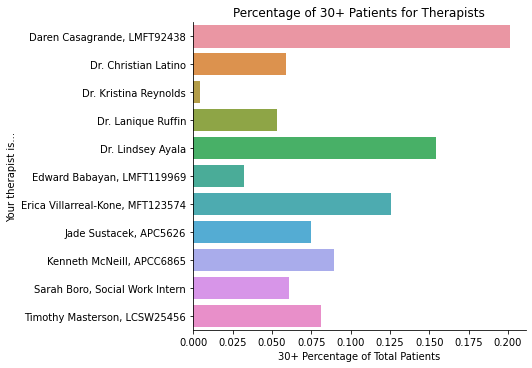

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

data_30 = data[data["30+"] == True]

therapists = data.groupby("Your therapist is...").size()
therapists_30 = data[data["30+"] == True].groupby("Your therapist is...").size()
therapists_30 = pd.DataFrame(therapists_30)
therapists_30.columns = ["total 30+"]

arr = []
for therapist in therapists_30.index:
  arr.append(therapists_30.loc[therapist, "total 30+"] / therapists[therapist])

therapists_30 = therapists_30.reset_index(level=0)

therapists_30["30+ Percentage of Total Patients"] = arr
sns.catplot(data=therapists_30, y="Your therapist is...", x="30+ Percentage of Total Patients",  kind="bar", aspect=1.5);
plt.title("Percentage of 30+ Patients for Therapists");
# type(therapists_30)

The goal presented by the professional therapists was to have fewer patients that would need 30+ visits as it is an indication that patients are not getting the care and therapy that they require. However, it should also be recognized that there are multiple factors involving why a patient may want to spend more session with a specific therapist, that may not simply indicate their treatment is not working. It could be the case that certain therapists take on more challenging patients or these therapists are very well liked.

## One hot encoding therapist names and dropping non important columns

In [ ]:
data = pd.get_dummies(data, columns=["Your therapist is..."])
data.head()

,date,First/Last Initials (e.g. LP or JTH),Last 4 Digits of Cell Phone,Session #,[I found it hard to wind down],[I was aware of dryness of my mouth],[I couldn't seem to experience any positive feeling at all],"[I experienced breathing difficulty (e.g., excessively rapid breathing, breathlessness in the absence of physical exertion)]",[I found it difficult to work up the initiative to do things],[I tended to over-react to situations],...,Your therapist is..._Dr. Lindsey Ayala,"Your therapist is..._Dr. Lourdes Mejia, PSY31830","Your therapist is..._Edward Babayan, LMFT119969","Your therapist is..._Erica Villarreal-Kone, MFT123574","Your therapist is..._Jade Sustacek, APC5626","Your therapist is..._Kenneth McNeill, APCC6865","Your therapist is..._Michelle Wright, AMFT110382","Your therapist is..._Sarah Boro, Social Work Intern","Your therapist is..._Sumit Sen, MFT Intern","Your therapist is..._Timothy Masterson, LCSW25456"
0,8/18/2020 14:02:03,OR,4251,1,3,2,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0
1,8/17/2020 18:00:02,MCD,4458,7,2,3,1,0,3,3,...,0,0,0,0,0,0,1,0,0,0
2,8/17/2020 16:58:38,LC,9185,25,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,8/16/2020 9:19:29,SO,7813,2,1,1,1,0,2,0,...,0,0,0,0,1,0,0,0,0,0
4,8/16/2020 8:58:36,SO,7813,2,1,1,1,0,2,0,...,0,0,0,0,1,0,0,0,0,0


## Visualizing the imbalance

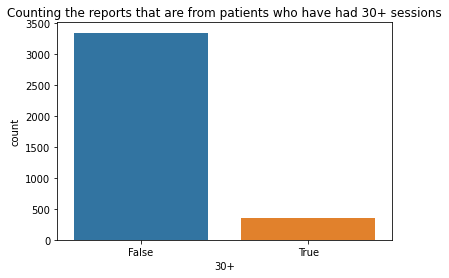

In [ ]:
sns.countplot(data=data, x="30+")
plt.title("Counting the reports that are from patients who have had 30+ sessions");

We noticed that this data was pretty imbalanced as most patients do not tend to stay 30+ sessions, this also was part of the reason that we chose to evaluate our model using a confusion matrix (F1 score in particular) and AUC as the baseline accuracy (just predicting everything as a False) was already pretty high. This also aided our decision to resample using crossvalidating and bootstrapping to even out the data a little more.

## Visualizing the scores for 30+ Patients

Based on prior knowledge from this dataset it would probably make sense for the patients with higher scores for depression/anxiety/stress to stay longer in therapy. Lets verify this

In [ ]:
data.iloc[:, 25:50].corr().style.background_gradient()

,21-30,30+,13-20,3 Month Follow Up,6 Month Follow Up,12 Month Follow Up,Stress,Anxiety,Depression,"Your therapist is..._Corin Massoud, NP","Your therapist is..._Daren Casagrande, LMFT92438",Your therapist is..._Dr. Christian Latino,"Your therapist is..._Dr. Chyna Hill, MSW",Your therapist is..._Dr. Kristina Reynolds,Your therapist is..._Dr. Lanique Ruffin,Your therapist is..._Dr. Lindsey Ayala,"Your therapist is..._Dr. Lourdes Mejia, PSY31830","Your therapist is..._Edward Babayan, LMFT119969","Your therapist is..._Erica Villarreal-Kone, MFT123574","Your therapist is..._Jade Sustacek, APC5626","Your therapist is..._Kenneth McNeill, APCC6865","Your therapist is..._Michelle Wright, AMFT110382","Your therapist is..._Sarah Boro, Social Work Intern","Your therapist is..._Sumit Sen, MFT Intern","Your therapist is..._Timothy Masterson, LCSW25456"
21-30,1.000000,-0.092409,-0.122479,-0.013412,-0.009479,-0.013412,-0.079478,-0.046306,-0.071233,-0.006701,-0.059143,0.049137,-0.014999,-0.073337,-0.052694,0.155902,-0.028560,-0.048938,0.015870,-0.000996,0.020443,-0.037989,-0.005663,-0.010599,-0.015281
30+,-0.092409,1.000000,-0.136741,-0.014974,-0.010582,-0.014974,0.044148,0.005049,0.044085,-0.007481,0.150894,-0.055393,-0.016746,-0.082706,-0.046197,0.091288,-0.031886,-0.056729,0.024102,-0.011664,-0.002609,-0.049919,-0.010740,-0.011833,-0.016219
13-20,-0.122479,-0.136741,1.000000,-0.019847,-0.014026,-0.019847,-0.106785,-0.104226,-0.135408,-0.009915,-0.034084,0.116859,-0.022195,-0.030591,-0.068235,0.071110,-0.042262,0.014379,-0.009489,0.036414,-0.016221,-0.041379,-0.040446,-0.015684,-0.059627
3 Month Follow Up,-0.013412,-0.014974,-0.019847,1.000000,-0.001536,-0.002173,-0.017606,0.006736,-0.028366,-0.001086,-0.019032,-0.021781,-0.002431,-0.012542,0.003648,0.075133,-0.004628,-0.012542,-0.010151,-0.008548,-0.008658,-0.007245,-0.004429,-0.001717,0.000158
6 Month Follow Up,-0.009479,-0.010582,-0.014026,-0.001536,1.000000,-0.001536,-0.028466,-0.026026,-0.022993,-0.000767,-0.013450,-0.015393,-0.001718,0.023967,-0.011066,0.053098,-0.003271,-0.008864,-0.007174,-0.006041,-0.006119,-0.005120,-0.003130,-0.001214,-0.012389
12 Month Follow Up,-0.013412,-0.014974,-0.019847,-0.002173,-0.001536,1.000000,-0.022141,0.014657,-0.020028,-0.001086,-0.019032,-0.021781,-0.002431,-0.012542,0.003648,0.059224,-0.004628,0.033912,-0.010151,-0.008548,-0.008658,-0.007245,-0.004429,-0.001717,-0.017530
Stress,-0.079478,0.044148,-0.106785,-0.017606,-0.028466,-0.022141,1.000000,0.628874,0.589912,-0.020123,0.073457,-0.118768,0.032037,0.071071,-0.072167,-0.075431,0.015081,0.087046,-0.045076,0.046089,0.028704,0.000558,0.056813,0.014038,0.051595
Anxiety,-0.046306,0.005049,-0.104226,0.006736,-0.026026,0.014657,0.628874,1.000000,0.544133,-0.018398,0.087090,-0.091426,-0.002210,0.083392,-0.086501,-0.093865,-0.012828,0.079720,-0.085170,0.078417,0.042100,0.013200,0.077559,0.035993,0.035113
Depression,-0.071233,0.044085,-0.135408,-0.028366,-0.022993,-0.020028,0.589912,0.544133,1.000000,0.012904,0.144166,-0.132523,0.028885,0.070990,-0.131933,-0.083563,0.005683,0.096498,-0.096697,0.092846,0.078052,0.015819,0.040280,0.052037,0.024093
"Your therapist is..._Corin Massoud, NP",-0.006701,-0.007481,-0.009915,-0.001086,-0.000767,-0.001086,-0.020123,-0.018398,0.012904,1.000000,-0.009508,-0.010882,-0.001214,-0.006266,-0.007823,-0.010152,-0.002312,-0.006266,-0.005072,-0.004271,-0.004326,-0.003620,-0.002213,-0.000858,-0.008758


Looks like the biggest correlation between 30+ is actually not DAS but actually the therapist that they are working with, however nothing has a correlation over 0.15

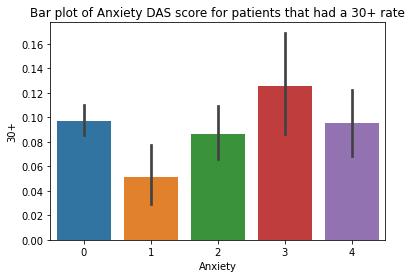

In [ ]:
sns.barplot(x='Anxiety', y='30+', data=data);

plt.title('Bar plot of Anxiety DAS score for patients that had a 30+ rate');

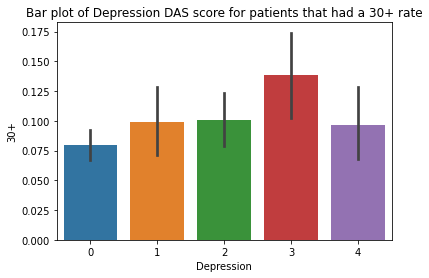

In [ ]:
# sns.kdeplot(data["Depression"][data['30+'] == True], color="red", shade=True);
# sns.kdeplot(data["Depression"][data['30+'] == False], shade=True);
sns.barplot(x='Depression', y='30+', data=data)

plt.title('Bar plot of Depression DAS score for patients that had a 30+ rate');

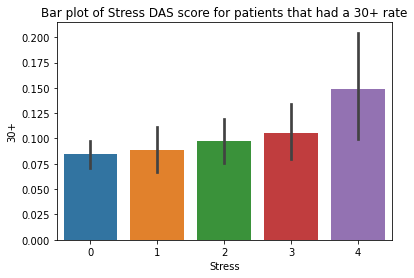

In [ ]:
sns.barplot(x='Stress', y='30+', data=data)

plt.title('Bar plot of Stress DAS score for patients that had a 30+ rate');

Overall these bar plots are showing that higher stress/depression/anxiety are generally in line with patients that take 30+ sessions.

In [ ]:
# sns.countplot(data=data[data["Your therapist is..."] == list(therapists_30["Your therapist is..."])], y="Your therapist is...", hue="Depression")

# Modeling

In [ ]:
# get the row # and last 4 digits of cell phone where data[30+] is true
tx = data[data['30+']][['Last 4 Digits of Cell Phone','30+']]
# find the unique phone numbers to prevent for repetitions
unique = tx['Last 4 Digits of Cell Phone'].unique()
# create a new column that determines if the phone # is a 30+, not sure why we did the unique thing?
uniquecol = data['Last 4 Digits of Cell Phone'].apply(lambda x: x in unique, )
data['thirtyplus'] = uniquecol
# create a new dataframe where the sessions are less than or equal to 6
early_prediction = data[data['Session #']<=10]


## Logistic Regression - Original
run a logistic regression on the data using the scores for depression, anxiety, and stress

In [ ]:
#logistic Regression
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [ ]:
early_prediction.shape

(2286, 51)

In [ ]:
useful_data = early_prediction[['Stress', 'Anxiety', 'Depression', 'thirtyplus']]
useful_data.sample(5)

,Stress,Anxiety,Depression,thirtyplus
1963,2,0,1,False
572,0,0,2,False
3156,0,0,0,False
242,2,4,3,False
139,3,3,2,False


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(useful_data.drop('thirtyplus',axis = 1), useful_data['thirtyplus'])
lr = LogisticRegression(solver = 'lbfgs', random_state=42)
lr.fit(x_train, y_train)

LogisticRegression(random_state=42)

In [ ]:
y_pred = lr.predict(x_test)

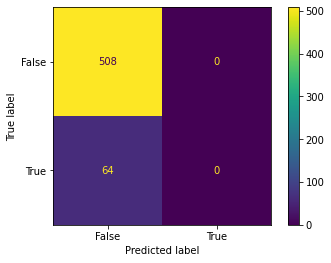

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lr.classes_)
disp.plot()
plt.show()

The confusion matrix is really showing that nothing is being categorized as true at all.

In [ ]:
lr.score(x_test, y_test)

0.8881118881118881

We are trying to see if we can tell if a patient is going to need 30+ sessions within the first 6 session based on their scores, we should also try to see if we can predict based off of their therapist as well.


In [ ]:
import statsmodels.api as sm

Xtrain = x_train
ytrain = y_train

log_reg = sm.Logit(ytrain, Xtrain).fit()
print(log_reg.summary())


Optimization terminated successfully.
         Current function value: 0.450615
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:             thirtyplus   No. Observations:                 1714
Model:                          Logit   Df Residuals:                     1711
Method:                           MLE   Df Model:                            2
Date:                Fri, 16 Dec 2022   Pseudo R-squ.:                 -0.3721
Time:                        19:16:58   Log-Likelihood:                -772.35
converged:                       True   LL-Null:                       -562.88
Covariance Type:            nonrobust   LLR p-value:                     1.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Stress        -0.2520      0.071     -3.574      0.000      -0.390      -0.114
Anxiety       -0.5142      0.

The baseline prediction for the data set involves feature engineering in order to retroactively set a variable thirtyplus to true if we know the patient eventually reaches 30+ sessions.

In [ ]:
from sklearn import metrics


base_pred = np.zeros(len(y_test))
print('Baseline')
print('Accuracy:  ',metrics.accuracy_score(y_test, base_pred).round(2))
print('Precision: ',metrics.precision_score(y_test, base_pred).round(2))
print('Recall:    ',metrics.recall_score(y_test, base_pred).round(2))
print('F1 Score:  ',metrics.f1_score(y_test, base_pred).round(2))

Baseline
Accuracy:   0.89
Precision:  0.0
Recall:     0.0
F1 Score:   0.0


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The accuracy, precision, recall, and f1_score for our model is as follows:

In [ ]:
pred = (log_reg.predict(x_test) > .5)*1

print('Prediction with threshold >.5')
print('Accuracy:  ',metrics.accuracy_score(y_test, pred).round(2))
print('Precision: ',metrics.precision_score(y_test, pred).round(2))
print('Recall:    ',metrics.recall_score(y_test, pred).round(2))
print('F1 Score:  ',metrics.f1_score(y_test, pred).round(2))

Prediction with threshold >.5
Accuracy:   0.89
Precision:  0.0
Recall:     0.0
F1 Score:   0.0


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Adjusting the threeshold to >= .5 lowers the accuracy, increases the precision and increases the recall and f1_score

In [ ]:
pred = (log_reg.predict(x_test) >= .5)*1

print('Prediction with threshold >=.5')
print('Accuracy:  ',metrics.accuracy_score(y_test, pred).round(2))
print('Precision: ',metrics.precision_score(y_test, pred).round(2))
print('Recall:    ',metrics.recall_score(y_test, pred).round(2))
print('F1 Score:  ',metrics.f1_score(y_test, pred).round(2))

Prediction with threshold >=.5
Accuracy:   0.67
Precision:  0.1
Recall:     0.25
F1 Score:   0.15


## Random Forest Attempt

In [ ]:
#adding in the therapists names to this
useful_data = early_prediction.iloc[:, 31:51]

Pulling out important features useing SelectFromModel

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn import metrics

x_train, x_test, y_train, y_test = train_test_split(useful_data.drop('thirtyplus',axis = 1), useful_data['thirtyplus'])
sel = SelectFromModel(RandomForestClassifier(n_estimators = 100))
sel.fit(x_train, y_train)
sel.get_support()
selected_feat= x_train.columns[(sel.get_support())]
print(selected_feat)

Index(['Stress', 'Anxiety', 'Depression',
       'Your therapist is..._Dr. Lindsey Ayala'],
      dtype='object')


In [ ]:
RF=RandomForestClassifier(n_estimators=100, max_depth=2, class_weight="balanced", min_samples_split= 9, criterion='gini', random_state=42)
RF.fit(x_train,y_train)
y_train_pred = RF.predict(x_train)
print("Train Accuracy:",metrics.accuracy_score(y_train, y_train_pred))

Train Accuracy: 0.7835472578763127


In [ ]:
y_pred = RF.predict(x_test)
print("Test Accuracy:",metrics.accuracy_score(y_test, y_pred))

Test Accuracy: 0.7814685314685315


In [ ]:
from sklearn.metrics import f1_score
print("F1 Score:", f1_score(y_test, y_pred))

F1 Score: 0.3902439024390244


In [ ]:
from sklearn.metrics import recall_score
print("Recall Score:", recall_score(y_test, y_pred))

Recall Score: 0.5797101449275363


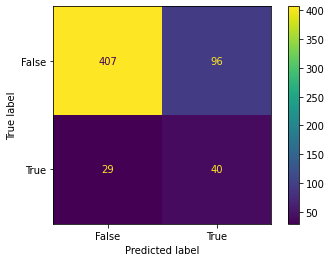

In [ ]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=RF.classes_)
disp.plot()
plt.show()

Accuracy when using hyperparameter "class_weight" = balanced decreases but it does look like there are significantly more datapoints being predicted as True (and a significant of False positives as well). Considering the implications of dataset, it would generally be better to diagnose someone as a potential 30+ session even when they wouldn't need it rather than miss diagnose a true 30+ patient as a false. Therefore ideally it may be better to have a fewer false negatives and recall may be a better measure here.

### Hyperparameter Tuning

In [ ]:
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

parameters = {
    "n_estimators":[5,50,100,250],
    "max_depth":[2,8,16,32,None],
    "class_weight" :["balanced", "balanced_subsample", None]

}

from sklearn.model_selection import GridSearchCV
cv = GridSearchCV(RF,parameters,cv=5, scoring="f1")
cv.fit(x_train,y_train.values.ravel())

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              max_depth=2, min_samples_split=9,
                                              random_state=42),
             param_grid={'class_weight': ['balanced', 'balanced_subsample',
                                          None],
                         'max_depth': [2, 8, 16, 32, None],
                         'n_estimators': [5, 50, 100, 250]},
             scoring='f1')

In [ ]:
m_best = cv.best_estimator_

In [ ]:
print(cv.best_params_)
print("\n")
mean_score = cv.cv_results_['mean_test_score'][0]
std_score = cv.cv_results_['std_test_score'][0]
print(mean_score, std_score)

{'class_weight': 'balanced', 'max_depth': 32, 'n_estimators': 50}


0.3175784880812167 0.040486288872434606


In [ ]:
y_pred = m_best.predict(x_test)
print("F1 Score:", f1_score(y_test, y_pred))

F1 Score: 0.35748792270531404


In [ ]:
print("Recall Score:", recall_score(y_test, y_pred))

Recall Score: 0.5362318840579711


In [ ]:
print("Test Accuracy:",metrics.accuracy_score(y_test, y_pred))

Test Accuracy: 0.7674825174825175


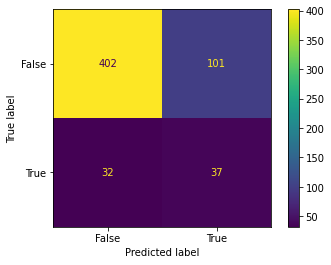

In [ ]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=RF.classes_)
disp.plot()
plt.show()

Overall this data is really suffering from a class imbalance here. https://towardsdatascience.com/methods-for-dealing-with-imbalanced-data-5b761be45a18 Referencing

## Resampling to balance

In [ ]:
useful_data.head(1)

,Stress,Anxiety,Depression,"Your therapist is..._Corin Massoud, NP","Your therapist is..._Daren Casagrande, LMFT92438",Your therapist is..._Dr. Christian Latino,"Your therapist is..._Dr. Chyna Hill, MSW",Your therapist is..._Dr. Kristina Reynolds,Your therapist is..._Dr. Lanique Ruffin,Your therapist is..._Dr. Lindsey Ayala,"Your therapist is..._Dr. Lourdes Mejia, PSY31830","Your therapist is..._Edward Babayan, LMFT119969","Your therapist is..._Erica Villarreal-Kone, MFT123574","Your therapist is..._Jade Sustacek, APC5626","Your therapist is..._Kenneth McNeill, APCC6865","Your therapist is..._Michelle Wright, AMFT110382","Your therapist is..._Sarah Boro, Social Work Intern","Your therapist is..._Sumit Sen, MFT Intern","Your therapist is..._Timothy Masterson, LCSW25456",thirtyplus
0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,False


In [ ]:
from sklearn.utils import resample

# Separate input features and target
y = useful_data["thirtyplus"]
X = useful_data.drop('thirtyplus', axis=1)

# setting up testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# concatenate our training data back together
X = pd.concat([X_train, y_train], axis=1)

# separate minority and majority classes
not_target = X[X["thirtyplus"]== False]
target = X[X["thirtyplus"] == True]

# upsample minority
target_upsampled = resample(target,
                          replace=True, # sample with replacement
                          n_samples=len(not_target), # match number in majority class
                          ) # reproducible results

# combine majority and upsampled minority
upsampled = pd.concat([not_target, target_upsampled])

# check new class counts
upsampled['thirtyplus'].value_counts()

False    1525
True     1525
Name: thirtyplus, dtype: int64

In [ ]:
y = upsampled.thirtyplus
X = upsampled.drop('thirtyplus', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


### Random Forest Resampled



In [ ]:
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

upsampled = RandomForestClassifier(n_estimators=50, max_depth=None, criterion='gini', random_state = 1).fit(X_train, y_train)
#random_state = 24 for docs
upsampled_pred = upsampled.predict(X)
print(recall_score(y, upsampled_pred))

upsampled_pred_org = upsampled.predict(useful_data.drop('thirtyplus',axis = 1))
print(recall_score(useful_data['thirtyplus'], upsampled_pred_org))
print(f1_score(useful_data['thirtyplus'], upsampled_pred_org))

0.9147540983606557
0.8151260504201681
0.5006451612903227


In [ ]:
# Checking accuracy
metrics.accuracy_score(y, upsampled_pred)

0.8780327868852459

In [ ]:
# f1 score
f1_score(y, upsampled_pred)

0.8823529411764706

In [ ]:
recall_score(y, upsampled_pred)

0.9147540983606557

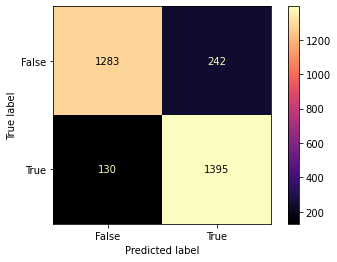

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y, upsampled_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=upsampled.classes_)
disp.plot(cmap='magma')
plt.show()


#### Running on Original Data

In [ ]:
# x_train_org, x_test_org, y_train_org, y_test_org = train_test_split(useful_data.drop('thirtyplus',axis = 1), useful_data['thirtyplus'])
upsampled_pred_org = upsampled.predict(useful_data.drop('thirtyplus',axis = 1))
f1_score(useful_data['thirtyplus'], upsampled_pred_org)

0.5006451612903227

In [ ]:
recall_score(useful_data['thirtyplus'], upsampled_pred_org)

0.8151260504201681

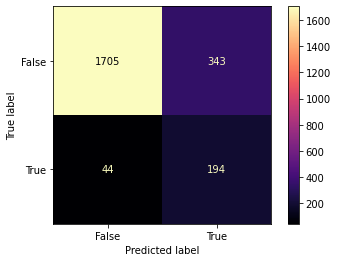

In [ ]:
cm = confusion_matrix(useful_data['thirtyplus'], upsampled_pred_org)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=upsampled.classes_)
disp.plot(cmap='magma')
plt.show()

#### Hyperparameter Tuning

In [ ]:
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

parameters = {
    "n_estimators":[5,50,100,250],
    # "max_depth":[2,8,16,32,None],
    "max_features" : ["sqrt", "log2", None]

}

from sklearn.model_selection import GridSearchCV
cv = GridSearchCV(upsampled,parameters,cv=5, scoring="f1")
cv.fit(X_train,y_train.values.ravel())

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(n_estimators=50, random_state=1),
             param_grid={'max_features': ['sqrt', 'log2', None],
                         'n_estimators': [5, 50, 100, 250]},
             scoring='f1')

In [ ]:
print(cv.best_params_)
print("\n")
mean_score = cv.cv_results_['mean_test_score'][0]
std_score = cv.cv_results_['std_test_score'][0]
print(mean_score, std_score)

{'max_features': 'sqrt', 'n_estimators': 100}


0.8575157570067949 0.014117113855145049


#### Feature Importance and a Single Decision Tree

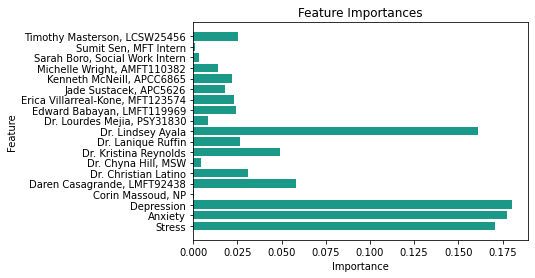

In [ ]:
import matplotlib.pyplot as plt
#Check out feature importances
importances = list(upsampled.feature_importances_)
feature_list = list(X_train.columns)
feature_list = [re.findall(r"(Your therapist is\.{3}_)?(.*)", x)[0][1] for x in feature_list]
x_values = list(range(len(importances)))


# Make a bar chart
plt.barh(x_values, importances, color=['#1a9988'])
# sns.barplot(x = x_values, y=feature_list, palette="Blues_d")
# Tick labels for x axis

plt.yticks(x_values, feature_list, fontsize=10)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances');

In [ ]:
X.columns
'Stress', 'Anxiety', 'Depression', 'Your therapist is..._Dr. Lindsey Ayala', 'Your therapist is..._Daren Casagrande, LMFT92438',



('Stress',
 'Anxiety',
 'Depression',
 'Your therapist is..._Dr. Lindsey Ayala',
 'Your therapist is..._Daren Casagrande, LMFT92438')

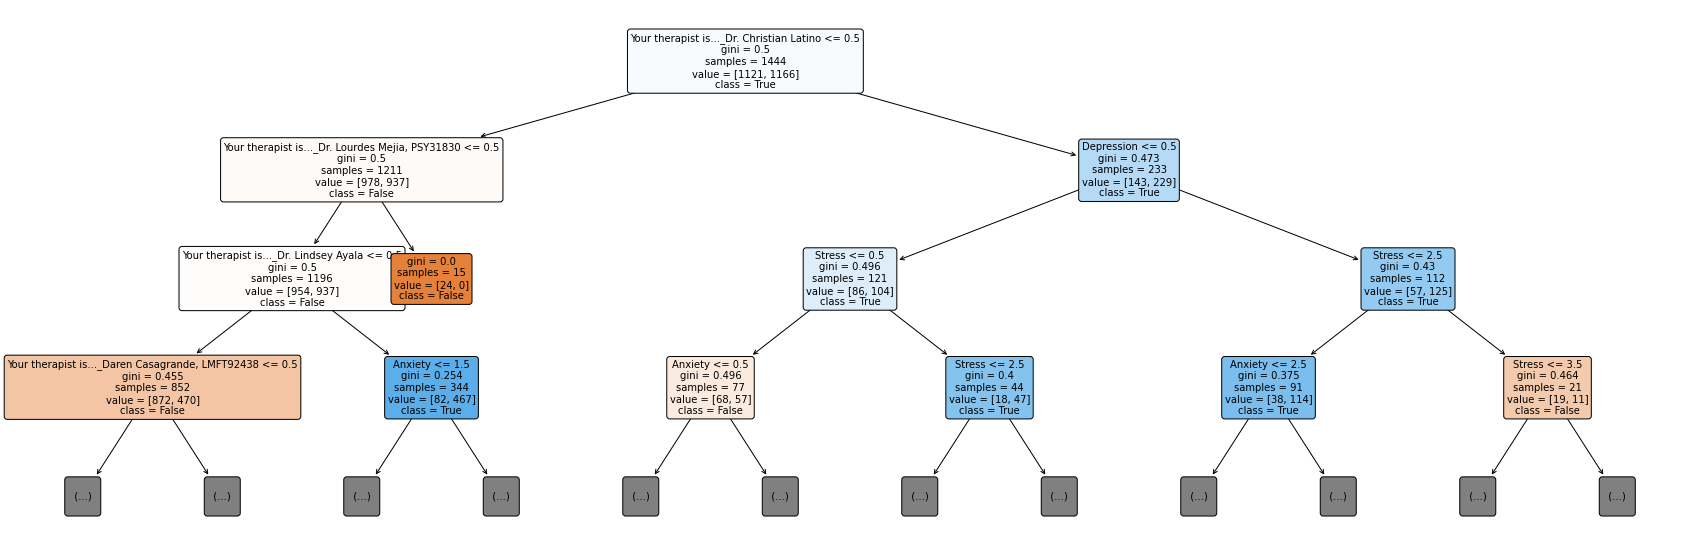

In [ ]:
from sklearn import tree

fig = plt.figure(figsize=(30, 10))
tree.plot_tree(upsampled.estimators_[2], max_depth = 3 ,
          feature_names=X.columns,
          class_names = ["False", "True"],
          filled=True, impurity=True,
          rounded=True, fontsize=10);

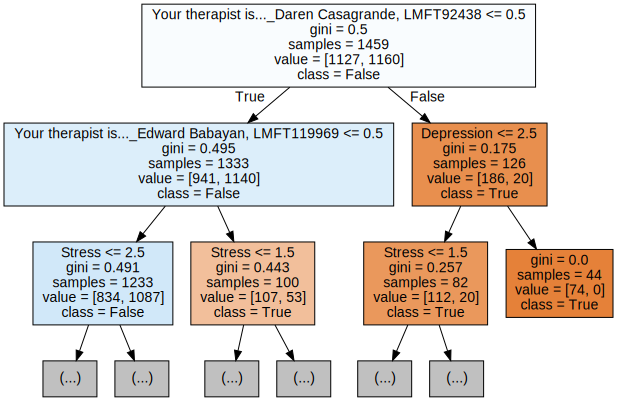

In [ ]:
# from sklearn.tree import plot_tree

# fig = plt.figure(figsize=(15, 10))
# plot_tree(upsampled.estimators_[1],
#           max_depth = 3 ,
#           feature_names=X.columns,
#           filled=True, impurity=True,
#           rounded=True);

import graphviz
from sklearn.tree import export_graphviz

dot_data = export_graphviz(upsampled.estimators_[3], max_depth = 2,
                           feature_names=X_train.columns,
                           class_names= ["True", "False"],
                           filled=True, impurity=True)

graph = graphviz.Source(dot_data, format='png')
graph

### Logistic Regression Resampled

In [ ]:
upsampled = LogisticRegression(solver = 'lbfgs', random_state=40).fit(X_train, y_train)
upsampled.fit(X_train, y_train)
upsampled_pred = upsampled.predict(X_test)

In [ ]:
# Checking accuracy
metrics.accuracy_score(y_test, upsampled_pred)

In [ ]:
# f1 score
f1_score(y_test, upsampled_pred)

In [ ]:
recall_score(y_test, upsampled_pred)

In [ ]:
cm = confusion_matrix(y_test, upsampled_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=RF.classes_)
disp.plot()
plt.show()

## Down Sampling

In [ ]:
from sklearn.utils import resample

# Separate input features and target
y = useful_data["thirtyplus"]
X = useful_data.drop('thirtyplus', axis=1)

# setting up testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# concatenate our training data back together
X = pd.concat([X_train, y_train], axis=1)

# separate minority and majority classes
not_target = X[X["thirtyplus"]== False]
target = X[X["thirtyplus"] == True]

# upsample minority
not_target_downsampled = resample(not_target,
                          replace=True, # sample with replacement
                          n_samples=len(target), # match number in majority class
                          ) # reproducible results

# combine majority and upsampled minority
upsampled = pd.concat([not_target_downsampled, target])

# check new class counts
upsampled['thirtyplus'].value_counts()

In [ ]:
y = upsampled.thirtyplus
X = upsampled.drop('thirtyplus', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [ ]:
upsampled = RandomForestClassifier(n_estimators=50, max_depth=2, class_weight="balanced", criterion='gini').fit(X_train, y_train)
upsampled_pred = upsampled.predict(X_test)

In [ ]:
# f1 score
f1_score(y_test, upsampled_pred)

##K Nearest Neighbors

 ### On resampled data

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [ ]:
#scaling them
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

x_train_scaled = scaler.fit_transform(X_train)
x_train = pd.DataFrame(x_train_scaled)

x_test_scaled = scaler.fit_transform(X_test)
x_test = pd.DataFrame(x_test_scaled)

In [ ]:
from sklearn import neighbors
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(x_train, y_train)  #fit the model
    pred=model.predict(x_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

In [ ]:
#plotting the rmse values against k values
curve = pd.DataFrame(rmse_val) #elbow curve
curve.plot()

We notice using the elbow method with rmse that using k = 5 would be a the best k value to use.

In [ ]:
model = neighbors.KNeighborsRegressor(n_neighbors = 5)

model.fit(x_train, y_train)  #fit the model
y_pred_raw=model.predict(x_test) #make prediction on test set
threshold = 0.6
y_pred = y_pred_raw >= threshold

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

In [ ]:
f1_score(y_test, y_pred)

In [ ]:
recall_score(y_test, y_pred)

In [ ]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='magma')
plt.show()

###On original data

In [ ]:
# x_train_org, x_test_org, y_train_org, y_test_org = train_test_split(useful_data.drop('thirtyplus',axis = 1), useful_data['thirtyplus'])
x_org_scaled = scaler.fit_transform(useful_data.drop('thirtyplus',axis = 1))
x_org_scaled = pd.DataFrame(x_org_scaled)

upsampled_pred_org = model.predict(x_org_scaled)
upsampled_pred_org = upsampled_pred_org >= threshold
f1_score(useful_data['thirtyplus'], upsampled_pred_org)

In [ ]:
recall_score(useful_data['thirtyplus'], upsampled_pred_org)

In [ ]:
cm = confusion_matrix(useful_data['thirtyplus'], upsampled_pred_org)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='magma')
plt.show()

## Cross Validated CART

### CART and Cross Validation

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, accuracy_score, recall_score

x_train, x_test, y_train, y_test = train_test_split(useful_data.drop('thirtyplus',axis = 1), useful_data['thirtyplus'])

grid_values = {'ccp_alpha': np.linspace(0, 0.10, 201),
               'random_state': [88]}
dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(x_train, y_train)
y_pred = dtc.predict(x_test)

print('Recall: ', recall_score(y_test, y_pred))
print('F1 Score: ', f1_score(y_test, y_pred))
print('Accuracy: ', accuracy_score(y_test, y_pred))

In [ ]:
dtc_cv = GridSearchCV(dtc, param_grid = grid_values, cv=5, scoring = 'f1', verbose=1).fit(x_train, y_train)
y_pred = dtc_cv.best_estimator_.predict(x_test)

print('Recall: ', recall_score(y_test, y_pred))
print('F1 Score: ', f1_score(y_test, y_pred))
print('Accuracy: ', accuracy_score(y_test, y_pred))

In [ ]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dtc_cv.classes_)
disp.plot(cmap='magma')
plt.show()

### CART Resampled

In [ ]:
count_class_0, count_class_1 = useful_data['thirtyplus'].value_counts()

df_class_0 = useful_data[useful_data['thirtyplus'] == False]
df_class_1 = useful_data[useful_data['thirtyplus'] == True]

#### Undersampled

In [ ]:
df_class_0_under = df_class_0.sample(count_class_1)
useful_data_under = pd.concat([df_class_0_under, df_class_1], axis=0)

x_train2, x_test2, y_train2, y_test2 = train_test_split(useful_data_under.drop('thirtyplus',axis = 1), useful_data_under['thirtyplus'])

dtc2 = DecisionTreeClassifier( random_state=42)
dtc2_cv = GridSearchCV(dtc2, param_grid = grid_values, cv=5, scoring = 'f1', verbose=1)
dtc2_cv.fit(x_train2, y_train2)
y_pred2 = dtc2_cv.best_estimator_.predict(x_test2)

print('Recall: ', recall_score(y_test2, y_pred2))
print('F1 Score: ', f1_score(y_test2, y_pred2))
print('Accuracy: ', accuracy_score(y_test2, y_pred2))

In [ ]:
cm = confusion_matrix(y_test2, y_pred2)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dtc2_cv.classes_)
disp.plot(cmap='magma')
plt.show()

#### Upsampled

In [ ]:
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
useful_data_over = pd.concat([df_class_0, df_class_1_over], axis=0)

x_train3, x_test3, y_train3, y_test3 = train_test_split(useful_data_over.drop('thirtyplus',axis = 1), useful_data_over['thirtyplus'])

dtc3 = DecisionTreeClassifier( random_state=42)
dtc3_cv = GridSearchCV(dtc3, param_grid = grid_values, cv=5, scoring = 'f1', verbose=1)
dtc3_cv.fit(x_train3, y_train3)
y_pred3 = dtc3_cv.best_estimator_.predict(x_test3)

print('Recall: ', recall_score(y_test3, y_pred3))
print('F1 Score: ', f1_score(y_test3, y_pred3))
print('Accuracy: ', accuracy_score(y_test3, y_pred3))

In [ ]:
cm = confusion_matrix(y_test3, y_pred3)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dtc3_cv.classes_)
disp.plot(cmap='magma')
plt.show()

##### Testing on original dataset

In [ ]:
original_over = dtc3_cv.predict(useful_data.drop('thirtyplus',axis = 1))
y = useful_data['thirtyplus']
print('Recall: ', recall_score(y, original_over))
print('F1 Score: ', f1_score(y, original_over))
print('Accuracy: ', accuracy_score(y, original_over))

In [ ]:
cm = confusion_matrix(y, original_over)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dtc3_cv.classes_)
disp.plot(cmap='magma')
plt.show()

## XGBoost (Extreme Gradient Boosting)

In [ ]:
params = {
 "learning_rate" : [0.05,0.10,0.15,0.20,0.25,0.30],
 "max_depth" : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma": [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
xgb = XGBClassifier(
    objective= 'binary:logistic',
    nthread=4,
    seed=42
)
cv = RandomizedSearchCV(xgb, params, n_jobs=-1,
                   cv=5,
                   scoring='recall',
                   verbose=3, refit=True)
cv.fit(X_train,y_train.values.ravel())

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=XGBClassifier(nthread=4, seed=42), n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                                             0.7],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          0.25, 0.3],
                                        'max_depth': [3, 4, 5, 6, 8, 10, 12,
                                                      15],
                                        'min_child_weight': [1, 3, 5, 7]},
                   scoring='recall', verbose=3)

In [ ]:
upsampled_xgb = cv.best_estimator_.fit(X_train, y_train)
upsampled_xgb_pred = upsampled_xgb.predict(X_test)

In [ ]:
f1_score(y_test, upsampled_xgb_pred)

0.8553137003841228

In [ ]:
recall_score(y_test, upsampled_xgb_pred)

0.9051490514905149

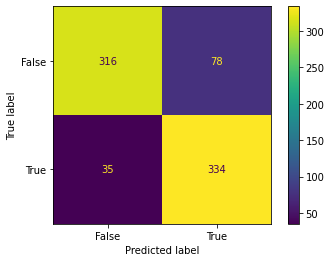

In [ ]:
cm = confusion_matrix(y_test, upsampled_xgb_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=cv.best_estimator_.classes_)
disp.plot()
plt.show()

In [ ]:
original_over_xgb = cv.best_estimator_.predict(useful_data.drop('thirtyplus',axis = 1))
y = useful_data['thirtyplus']
print('Recall: ', recall_score(y, original_over))
print('F1 Score: ', f1_score(y, original_over))
print('Accuracy: ', metrics.accuracy_score(y, original_over))

Recall:  0.8781512605042017
F1 Score:  0.4739229024943311
Accuracy:  0.7970253718285214


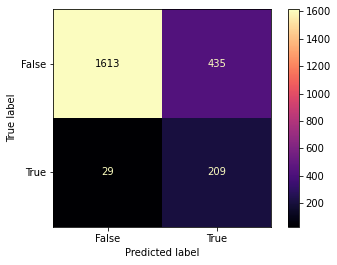

In [ ]:
cm = confusion_matrix(y, original_over_xgb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=cv.best_estimator_.classes_)
disp.plot(cmap='magma')
plt.show()